In [117]:
import numpy as np

# read in the text file
with open('Kritias.txt') as f:
    lines = f.readlines()

def show_char_distribution(lines):
    # get histogram of the characters
    frequency_table = {}
    for line in lines:
        for c in line:
            if c in frequency_table:
                frequency_table[c] += 1
            else:
                frequency_table[c] = 1

    # print characters in order of frequency
    for c in sorted(frequency_table, key=frequency_table.get, reverse=True):
        print(c, frequency_table[c])

show_char_distribution(lines)

  7547
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
, 567
p 491
b 438
v 351
. 191
k 142
I 86
A 83
T 79
; 74

 64
x 55
S 36
E 34
q 33
z 31
C 29
: 27
H 26
M 21
O 20
R 17
- 17
j 16
— 14
P 13
W 11
F 11
N 11
L 10
B 9
' 5
U 3
? 3
D 3
Z 3
Y 2
G 2
! 1
J 1
V 1


In [118]:
import re
# remove NAME: prefix of lines 
cleaned_lines = []
regex_name_prefix = re.compile(r'[A-Z]+: ')
regex_unwantend = re.compile(r"[,\-'\n]")
regex_other_punctuation = re.compile(r'[:;!?—]')
for line in lines:
        match = regex_name_prefix.match(line)
        if match and line.startswith(match.group()):
            clean_line = line[len(match.group()):]
        else:
            clean_line = line
        # more cleaning
        clean_line = regex_unwantend.sub(' ', clean_line)
        clean_line = regex_other_punctuation.sub('.', clean_line)
        clean_line = clean_line.replace('  ', ' ')
        cleaned_lines.append(clean_line)

show_char_distribution(cleaned_lines)

  7617
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
p 491
b 438
v 351
. 295
k 142
I 79
A 68
T 64
x 55
q 33
z 31
H 21
C 17
S 16
j 16
E 16
M 13
P 13
W 11
F 11
N 11
L 10
O 10
B 9
D 3
Z 3
Y 2
G 2
J 1
V 1


In [119]:
# get list of sentences
sentences = []
for line in cleaned_lines:
    sentences += line.split('.')
sentences = [s.strip().lower() for s in sentences if s.strip()]

for sentence in sentences:
    print(sentence)
    
# get list of words
words = []
for sentence in sentences:
    words += sentence.split()
words = [w.strip().lower() for w in words if w.strip()]
words = list(set(words))
print(words)

how thankful i am socrates that i have arrived at last and like a weary traveller after a long journey may be at rest
and i pray the being who always was of old and has now been by me revealed to grant that my words may endure in so far as they have been spoken truly and acceptably to him
but if unintentionally i have said anything wrong i pray that he will impose upon me a just retribution and the just retribution of him who errs is that he should be set right
wishing then to speak truly in future concerning the generation of the gods i pray him to give me knowledge which of all medicines is the most perfect and best
and now having offered my prayer i deliver up the argument to critias who is to speak next according to our agreement
and i timaeus accept the trust and as you at first said that you were going to speak of high matters and begged that some forbearance might be shown to you i too ask the same or greater forbearance for what i am about to say
and although i very well know t

In [120]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Remove stopwords from your text
filtered_words = [word for word in words if word not in stopwords_list]

# stem words
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
stemmed_words = list(set(stemmed_words))


[nltk_data] Downloading package stopwords to /home/bela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [121]:
# select which words to use
relevant_words = filtered_words

In [122]:
# get term sentence matrix
term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for i, sentence in enumerate(sentences):
    for j, word in enumerate(relevant_words):
        term_sentence_matrix[j, i] = sentence.count(word)
        
normalized_term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for i in range(len(relevant_words)):
    normalized_term_sentence_matrix[i] = term_sentence_matrix[i] / np.linalg.norm(term_sentence_matrix[i])
    
print(term_sentence_matrix)
print(term_sentence_matrix.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1595, 288)


In [135]:
# rank reduction by svd
U, s, V = np.linalg.svd(normalized_term_sentence_matrix)
rank = 20
U_rank = U[:, :rank]
s_rank = np.diag(s[:rank])
V_rank = V[:rank, :]
term_sentence_matrix_rank = U_rank @ s_rank @ V_rank
print(term_sentence_matrix_rank)

[[-0.00115551  0.00747131  0.02024189 ...  0.00067868  0.0063818
   0.00570107]
 [ 0.00098997  0.00246668  0.00301103 ...  0.00255227  0.00473381
   0.00586091]
 [ 0.00205682  0.00442889  0.00538979 ...  0.00381599  0.00816383
   0.00728419]
 ...
 [-0.00059538 -0.0006853  -0.00022213 ... -0.00074648 -0.00161002
   0.00302128]
 [ 0.00401321  0.00140683  0.00626441 ...  0.00285804  0.00432294
   0.00588365]
 [ 0.00218819 -0.00272228 -0.00177128 ...  0.00056897 -0.0025622
   0.00048473]]


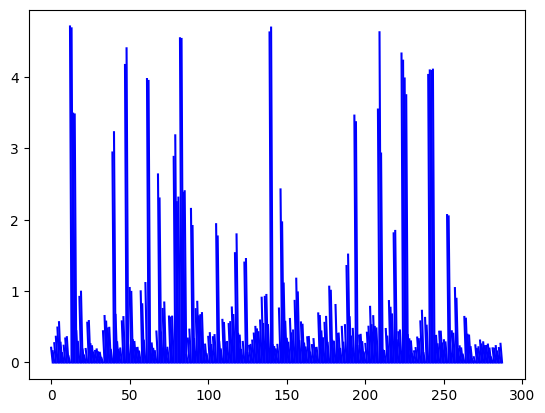

In [136]:
import matplotlib.pyplot as plt
# plot the distance between two consecutive sentences
for i in range(len(sentences)-1):
    plt.plot([i, i+1], [np.linalg.norm(term_sentence_matrix_rank[:, i] - term_sentence_matrix_rank[:, i+1]), 0], "b")

In [143]:
# implement k-means clustering
def kmeans(X, k, max_iter=100):
    n, d = X.shape
    # initialize the centroids from seed
    np.random.seed(1)
    centroids = X[np.random.choice(n, k, replace=False)]
    for _ in range(max_iter):
        # assign each point to the closest centroid
        labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
        # update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        # check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels



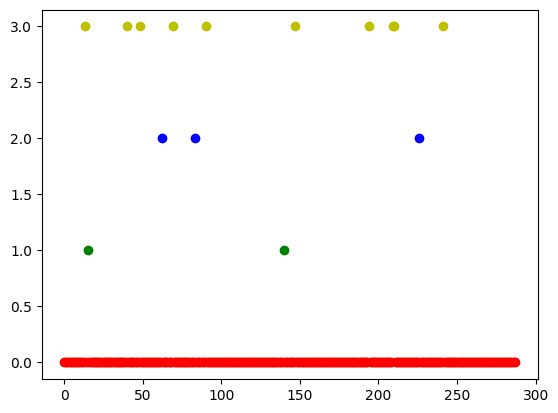

In [138]:
# plot the data with the k-means clustering
k = 4
labels = kmeans(term_sentence_matrix_rank.T, k)
colors = ['r', 'g', 'b','y','orange', 'purple']
for i in range(len(sentences)):
    plt.scatter(i, labels[i], color=colors[labels[i]])

In [139]:
# get "topics" from centroids
centroids = []
for label in range(k):
    centroids.append(np.mean(term_sentence_matrix_rank.T[labels == label], axis=0))

for i, centroid in enumerate(centroids):
    print("Topic", i)
    # print top 10 words
    for word, value in sorted(zip(relevant_words, centroid), key=lambda x: x[1], reverse=True)[:10]:
        print(word, value)

Topic 0
us 0.02424249749767648
king 0.020015398721727796
go 0.019798722525049748
art 0.018943709927645085
one 0.018465461539583342
land 0.017252704276301743
red 0.01704859284984182
ever 0.016879924529450828
ten 0.0165277383481359
use 0.01596515514782778
Topic 1
console 0.4923418534487478
chestnuts 0.49234185344874776
hard 0.49234185344874776
affording 0.49234185344874776
keeping 0.49234185344874776
dinner 0.49234185344874776
spoil 0.49234185344874776
dessert 0.49234185344874776
eating 0.49234185344874776
ointments 0.49234185344874776
Topic 2
treasuring 0.3153088128901513
hollows 0.3153088128901513
reaped 0.31530881289015117
providing 0.3153088128901511
absorbed 0.3153088128901511
observed 0.3153088128901511
clay 0.3153088128901511
memorials 0.3153088128901511
rainfall 0.3153088128901511
flows 0.3153088128901511
Topic 3
tended 0.1385545285270543
tend 0.13183187313725397
bound 0.13177491935951788
two 0.11736322457559416
became 0.1167423025972402
extended 0.10511950052361156
vessel 0.1043

In [140]:
# calculate saliency scores
AAT=term_sentence_matrix_rank @term_sentence_matrix_rank.T
ATA= term_sentence_matrix_rank.T @ term_sentence_matrix_rank
u=np.linalg.eig(AAT).eigenvectors[0]
print(u.shape)
v=np.linalg.eig(ATA).eigenvectors[0]
print(v.shape)


(1595,)
(288,)


In [141]:
# show most salient words
word_saliency = {}
for i, word in enumerate(relevant_words):
    word_saliency[word] = np.linalg.norm(u[i])

print("saliency of atlantis:" , word_saliency["atlantis"])
for word in sorted(word_saliency, key=word_saliency.get, reverse=True)[:50]:
    print(word_saliency[word],"\t", word)


saliency of atlantis: 0.002300832198709628
0.12923951730543712 	 ran
0.10152992943002637 	 impart
0.10152992943002637 	 near
0.07999499523922392 	 trees
0.0682180791262842 	 clearly
0.06744678241704642 	 retribution
0.06552675977117642 	 isthmus
0.05460532312061346 	 head
0.05260456011020897 	 bulls
0.05260456011020897 	 length
0.05131777936854131 	 yesterday
0.05131777936854131 	 furnish
0.04269447133528442 	 please
0.04269447133528442 	 reflection
0.042089213121522334 	 descent
0.042089213121522334 	 drew
0.04149478631858615 	 multitude
0.04149478631858615 	 weave
0.040473179792163444 	 countries
0.03499165996612845 	 chastened
0.03499165996612845 	 excepting
0.03036118932297421 	 warning
0.03036118932297421 	 heights
0.029540872274141233 	 became
0.02859921629023884 	 laid
0.02777810847914824 	 struggle
0.027521910432894935 	 sister
0.027521910432894935 	 gave
0.025750488297934648 	 quest
0.025343972445806495 	 accordance
0.02506461583256742 	 riding
0.02506461583256742 	 benefit
0.

In [142]:
# show most salient sentences
sentence_saliency = {}
for i, sentence in enumerate(sentences):
    sentence_saliency[sentence] = np.linalg.norm(v[i])
for sentence in sorted(sentence_saliency, key=sentence_saliency.get, reverse=True):
    print(sentence_saliency[sentence])
    print(sentence)
    print("-----------------")

0.0910592620769133
in the first place the acropolis was not as now
-----------------
0.0910592620769133
for the fact is that a single night of excessive rain washed away the earth and laid bare the rock
-----------------
0.08624829656683494
for friends should not keep their stories to themselves but have them in common
-----------------
0.06850630841043771
there were artisans and there were husbandmen and there was also a warrior class originally set apart by divine men
-----------------
0.06850630841043771
the latter dwelt by themselves and had all things suitable for nurture and education
-----------------
0.05630197135685725
and there they implanted brave children of the soil and put into their minds the order of government
-----------------
0.05630197135685725
their names are preserved but their actions have disappeared by reason of the destruction of those who received the tradition and the lapse of ages
-----------------
0.05451179102552847
let us give the precedence to athens
--